In [1]:
# Load libraries

import pandas as pd
import json
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

#Plot the data:
my_colors = 'rgbkymc'  #red, green, blue, black, etc.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"


In [2]:
# Import data
data_path1="data/srl_test.json"
data_path2="data/ldc_corpus.json"

with open(data_path2) as json_data:
    data = json.load(json_data)

data=data['sentences']    
df=pd.DataFrame(data)


In [3]:
# Counting
col_list= list(df)
col_list.remove('sentence')
col_list.remove('predicates')
col_list.remove('multiplePredicates')
col_list.remove('tokenLength')
col_list.remove('src')

# Create subset of dataframe
df_relations = df[col_list]
sentences_with_multiple_preds=df['multiplePredicates'].sum(axis=0)
df_src = df['src']
df_tokens=df['tokenLength']

## SRL Data Sources

In [4]:

df_src=df_src.value_counts(dropna=True).to_frame()
#print (df_src)
print ("total sentences : ", len(df_relations))
print ("sentences with multiple predicates : ", sentences_with_multiple_preds)

total sentences :  22276
sentences with multiple predicates :  18216


In [5]:
df_src

,src
hit,22276


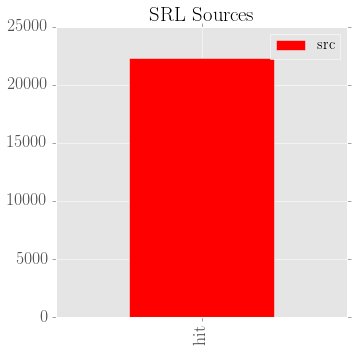

In [6]:
f = plt.figure(figsize=(5, 5)) # Change the size as necessary
#Plot the data:
df_src.plot.bar(ax=f.gca(),color=my_colors) # figure.gca means "get current axis"
plt.title('SRL Sources', color='black')

## SRL Relations Count

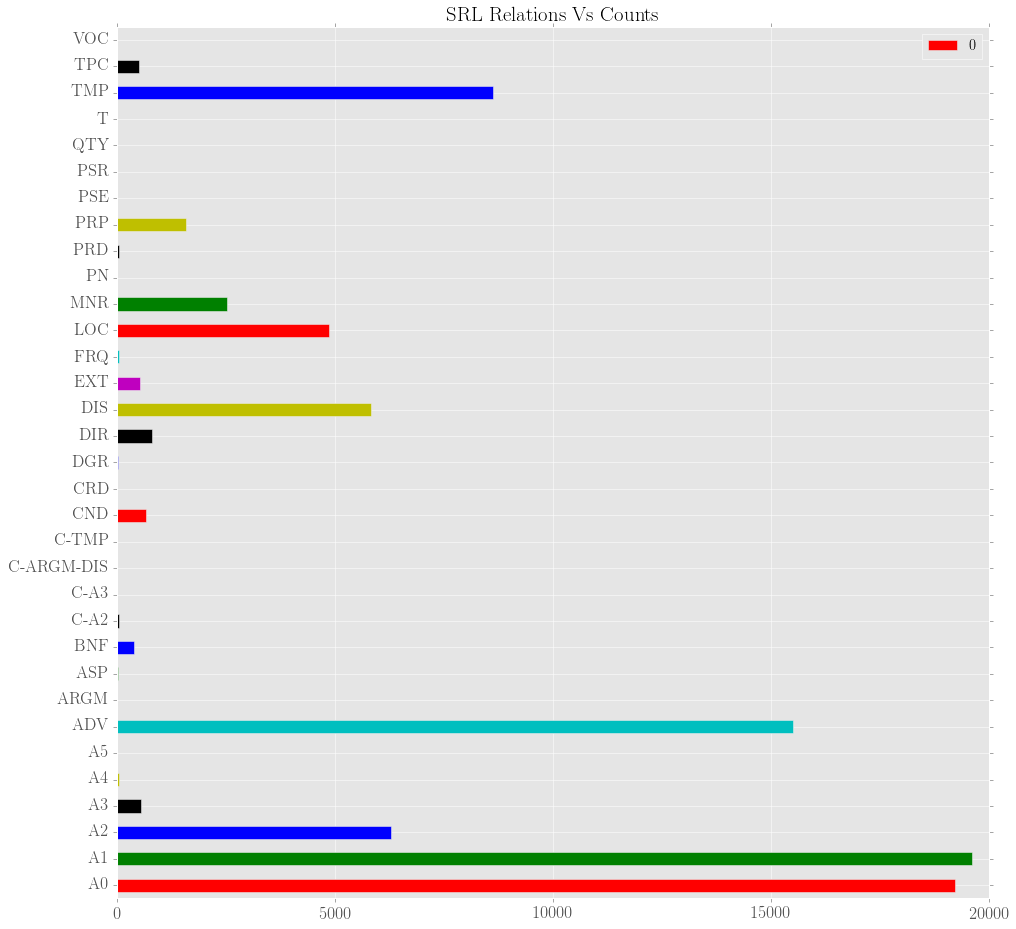

In [7]:
df_relations=df_relations.sum(axis=0).to_frame()
f = plt.figure(figsize=(15, 15)) # Change the size as necessary
#Plot the data:
df_relations.plot.barh(ax=f.gca(),color=my_colors) # figure.gca means "get current axis"
plt.title('SRL Relations Vs Counts', color='black')


In [8]:
df_relations


,0
A0,19224
A1,19608
A2,6289
A3,542
A4,38
A5,1
ADV,15499
ARGM,2
ASP,14
BNF,381


## Token Lengths in Data

In [9]:
df_tokens_temp=df_tokens.value_counts(dropna=True,ascending=True)
average_token_length=df_tokens.mean()

Average token length of sentence in SRL:  27.340052073980967


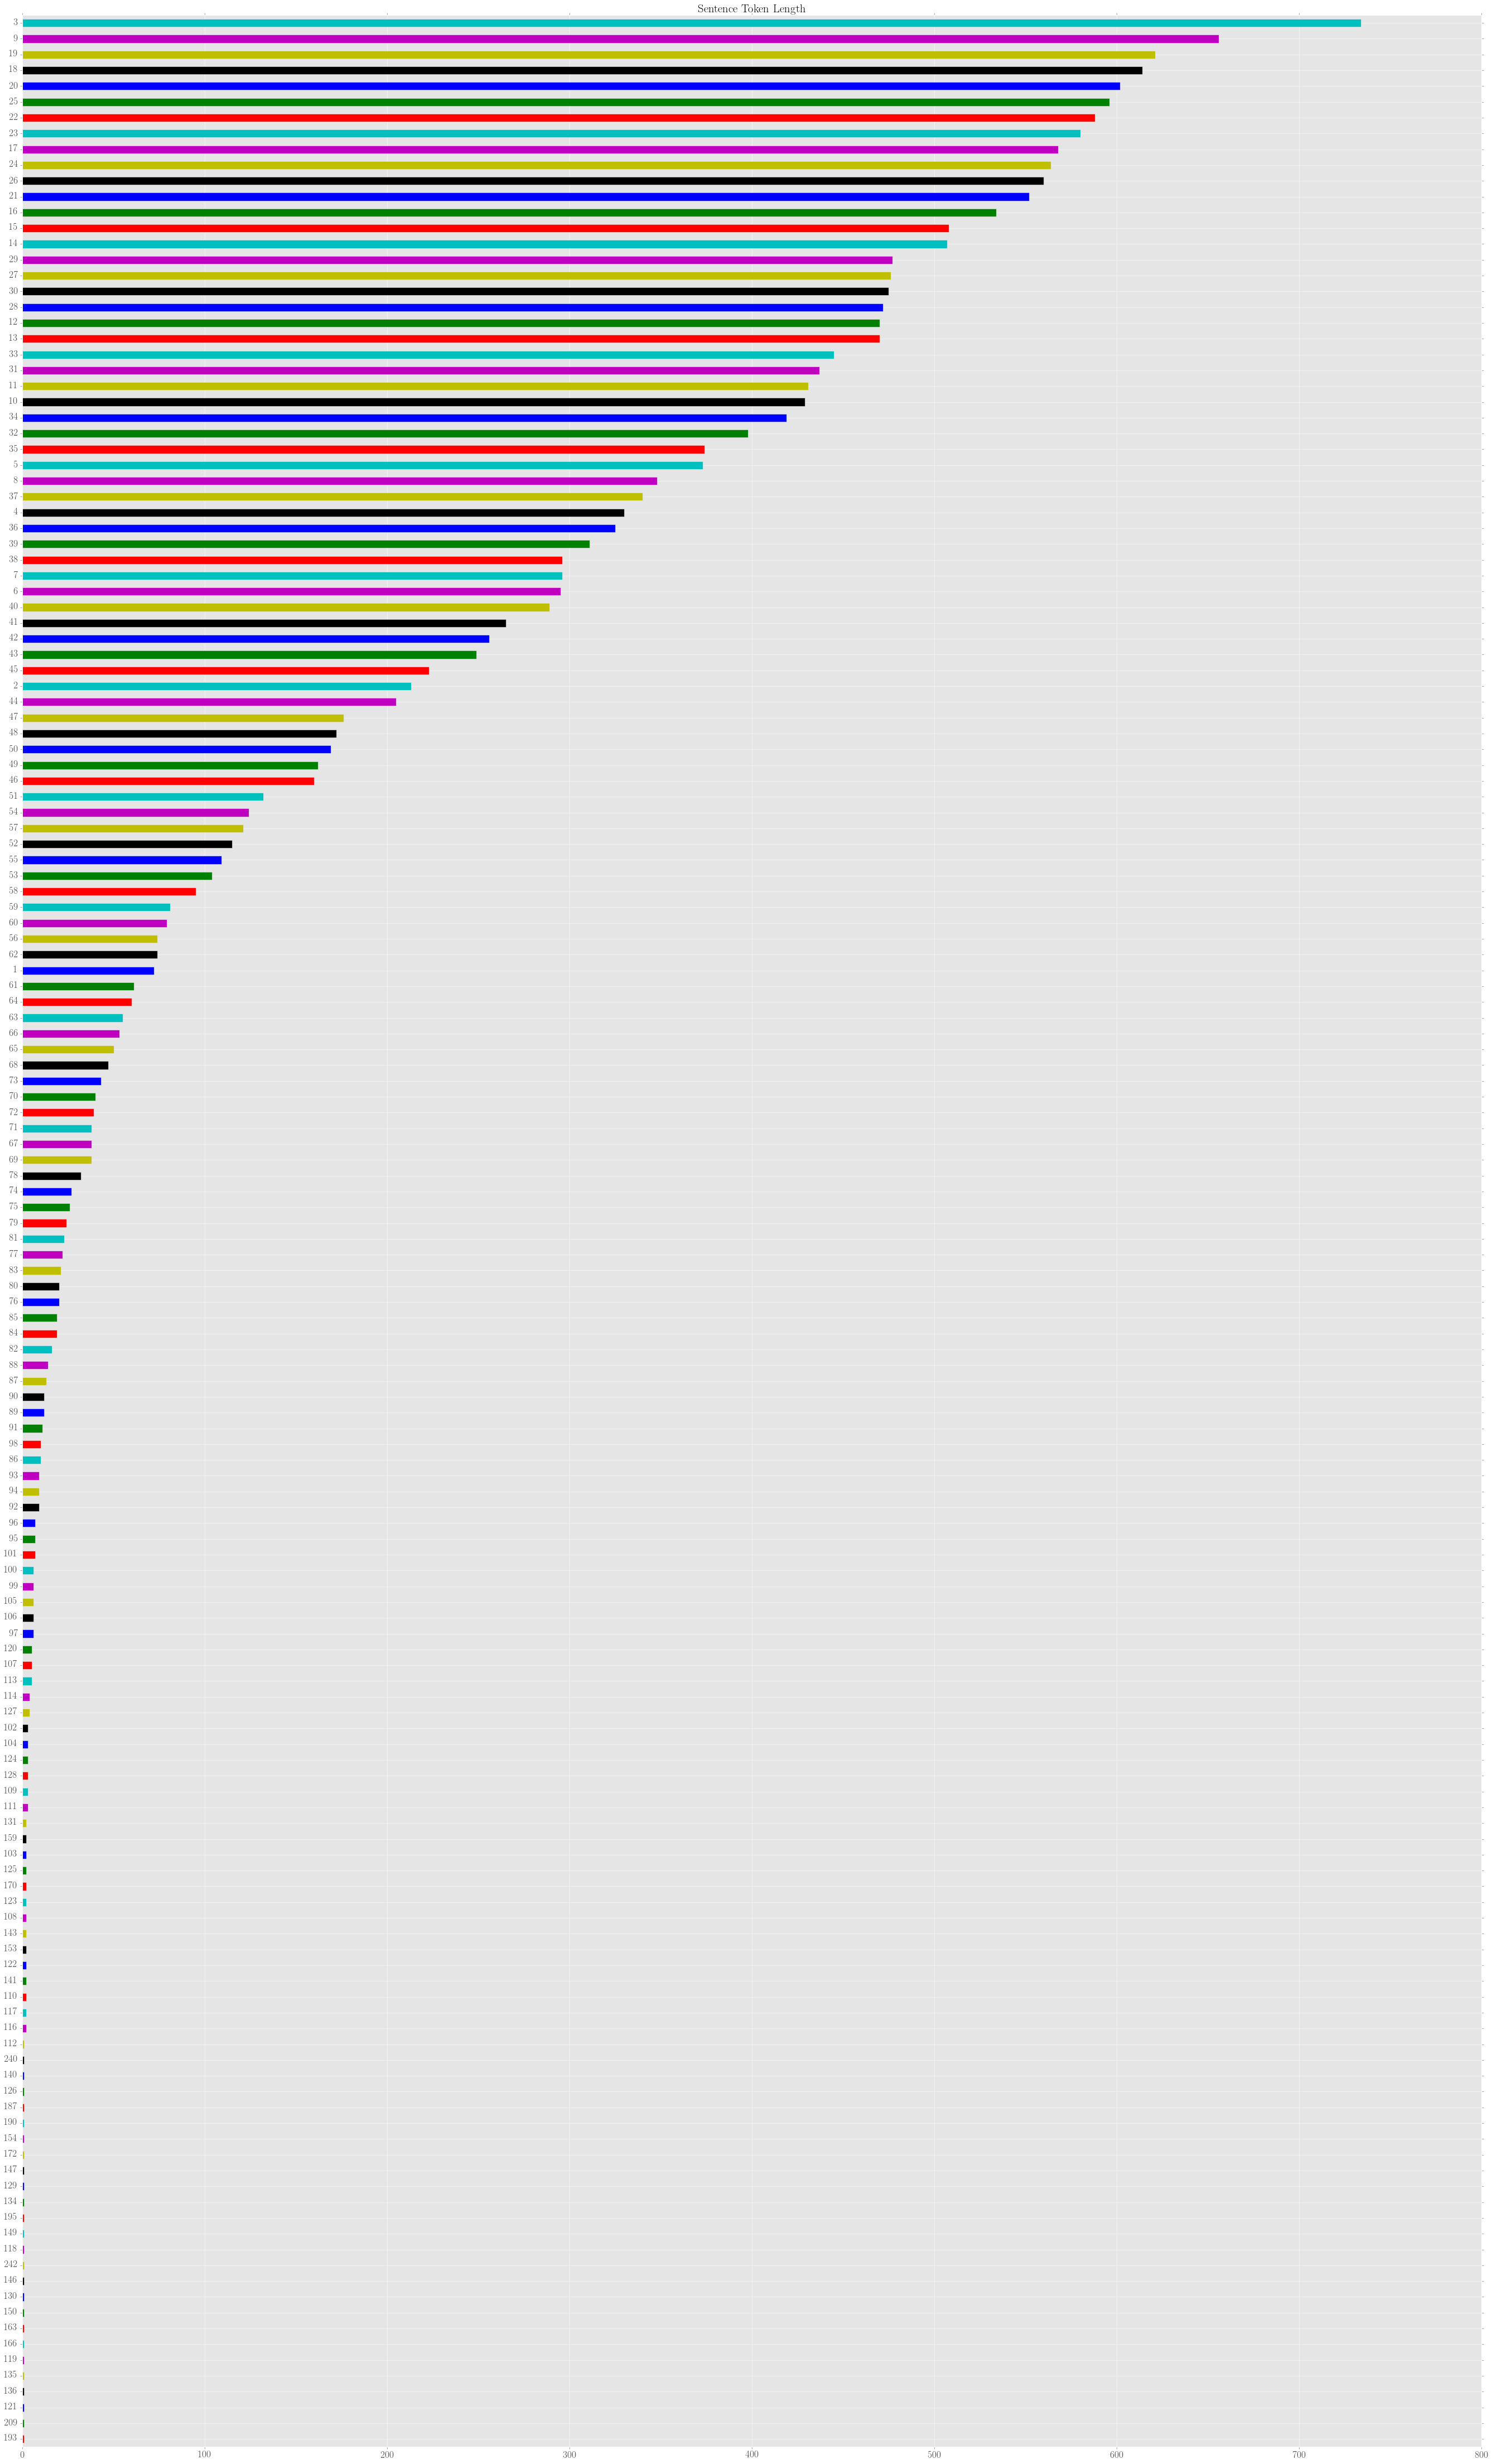

In [10]:
f = plt.figure(figsize=(45, 75)) # Change the size as necessary
#Plot the data:
df_tokens_temp.plot.barh(ax=f.gca(),color=my_colors) # figure.gca means "get current axis"

print('Average token length of sentence in SRL: ',average_token_length)
plt.title('Sentence Token Length', color='black')